# Training ML Algorithm

1. Creating training, validation & testing sets
2. Standardising the datasets
3. Training the model
4. Hyperparameter Tuning
5. Testing the trained model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('final_df.csv')

df = pd.DataFrame(data)

df.drop('Unnamed: 0', axis=1, inplace=True)

print(df)

       resident_status  education_2003_revision  month_of_death  sex  \
0                    1                      1.0               0    0   
1                    1                      0.0               0    1   
2                    0                      0.0               0    1   
3                    1                      0.0               0    1   
4                    0                      1.0               0    0   
...                ...                      ...             ...  ...   
72461                0                      0.0               1    1   
72462                1                      0.0               1    0   
72463                1                      0.0               1    1   
72464                1                      1.0               0    0   
72465                0                      0.0               1    0   

       age_recode_27  marital_status  day_of_week_of_death  358_cause_recode  \
0                  0               0                   

In [4]:
from sklearn.model_selection import train_test_split

X = df[['resident_status', 'education_2003_revision', 
        'month_of_death', 'sex', 'age_recode_27', 'marital_status', 'day_of_week_of_death',
       'race_recode_5']]
y = df['358_cause_recode']

# Split the data into a training set(80%) and testing set (20%)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 0)

# Split the testing set into a validation set (50%) and training set (50%)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state= 0)

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

# Standardise the splits
X_train = (X_train - X_means) / X_stds
X_val = (X_val - X_means) / X_stds
X_test = (X_test - X_means) / X_stds

print('Shape of X dataframe: {}'.format(X.shape))
print('Shape of X_train dataframe: {}'.format(X_train.shape))
print('Shape of X_test dataframe: {}'.format(X_test.shape))
print('Shape of X_val dataframe: {}'.format(X_val.shape))

Shape of X dataframe: (72466, 8)
Shape of X_train dataframe: (57972, 8)
Shape of X_test dataframe: (7247, 8)
Shape of X_val dataframe: (7247, 8)


In [8]:
# Model 1 - Default parameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Creating Random Forest Model with initial hyperparameters
model = RandomForestClassifier(max_depth = 2, min_samples_split = 0.1, random_state = 0)
model = model.fit(X_train,y_train)

# Prediction of model for the y value for the training, validation and testing set
ypred_train = model.predict(X_train)
ypred_val = model.predict(X_val)
ypred_test = model.predict(X_test)

# Classifier metric scores for model on the training set
acc_train = accuracy_score(y_train, ypred_train)
prec_train = precision_score(y_train,ypred_train)
rec_train = recall_score(y_train,ypred_train)

# Classifier metric scores for model on the validation set
acc_val = accuracy_score(y_val, ypred_val)
prec_val = precision_score(y_val,ypred_val)
rec_val = recall_score(y_val,ypred_val)

# Classifier metric scores for model on the testing set
acc_test = accuracy_score(y_test, ypred_test)
prec_test = precision_score(y_test,ypred_test)
rec_test = recall_score(y_test,ypred_test)

print('TRAINING SET:',
      'Accuracy:{} '.format(acc_train),
      'Precision:{} '.format(prec_train),
      'Recall:{} '.format(rec_train),
      '\n',
      sep='\n')
print('VALIDATION SET:',
      'Accuracy:{} '.format(acc_val),
      'Precision:{} '.format(prec_val),
      'Recall:{} '.format(rec_val),
      '\n',
      sep='\n')
print('TESTING SET:',
      'Accuracy:{} '.format(acc_test),
      'Precision:{} '.format(prec_test),
      'Recall:{} '.format(rec_test),
      '\n',
      sep='\n')

TRAINING SET:
Accuracy:0.7807389774373835 
Precision:0.7620737047335954 
Recall:0.8190656131913432 


VALIDATION SET:
Accuracy:0.7742514143783634 
Precision:0.7540121020784004 
Recall:0.8034763106251752 


TESTING SET:
Accuracy:0.7807368566303298 
Precision:0.7557867360208063 
Recall:0.8172103487064117 




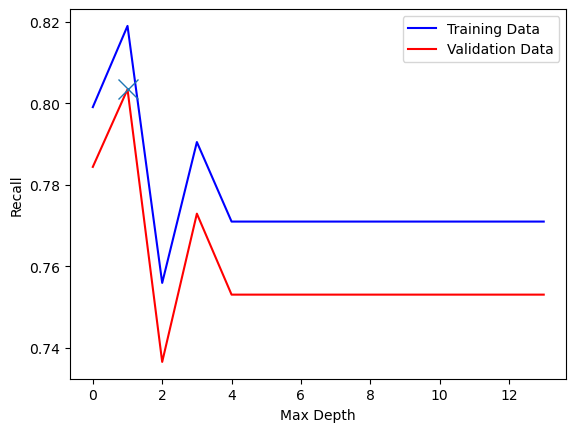

TRAINING SET:
Accuracy:0.7815669633616229 
Precision:0.7796062697630138 
Recall:0.787667468223978 


VALIDATION SET:
Accuracy:0.773147509314199 
Precision:0.7691015952980689 
Recall:0.7703952901597981 




In [9]:
# Model 2 - Changing Max Depth

# Empty lists to store the recall scores of the model on the training and validation set
rec_train = []
rec_val = []

# For loop that calculates the recall scores of model as the max depth changes
# between 1 and 14
for i in range (1,15):
    dt = RandomForestClassifier(max_depth = i, min_samples_split = 0.1,random_state= 0)
    dt.fit(X_train, y_train)
    ypred_train = model.predict(X_train)
    ypred_val = model.predict(X_val)
    ypred_test = model.predict(X_test)
    rec_train.append(recall_score(y_train, dt.predict(X_train)))
    rec_val.append(recall_score(y_val, dt.predict(X_val)))

# Plotting recall against max depth
plt.figure()
plt.plot(rec_train, 'b')
plt.plot(rec_val, 'r')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.legend(['Training Data','Validation Data'])
max_recall = np.max(rec_val)
plt.plot(1, max_recall, marker= 'x', markersize = 15)
plt.show()

# Modifying Random Forest Model with updated hyperparameter of 4
model = RandomForestClassifier(max_depth = 4, min_samples_split = 0.1)
model = model.fit(X_train,y_train)

# Prediction of model for the y value for the training and validation set
ypred_train = model.predict(X_train)
ypred_val = model.predict(X_val)

# Classifier metric scores for model on the training set
acc_train = accuracy_score(y_train, ypred_train)
prec_train = precision_score(y_train,ypred_train)
rec_train = recall_score(y_train,ypred_train)

# Classifier metric scores for model on the validation set
acc_val = accuracy_score(y_val, ypred_val)
prec_val = precision_score(y_val,ypred_val)
rec_val = recall_score(y_val,ypred_val)


print('TRAINING SET:',
      'Accuracy:{} '.format(acc_train),
      'Precision:{} '.format(prec_train),
      'Recall:{} '.format(rec_train),
      '\n',
      sep='\n')
print('VALIDATION SET:',
      'Accuracy:{} '.format(acc_val),
      'Precision:{} '.format(prec_val),
      'Recall:{} '.format(rec_val),
      '\n',
      sep='\n')

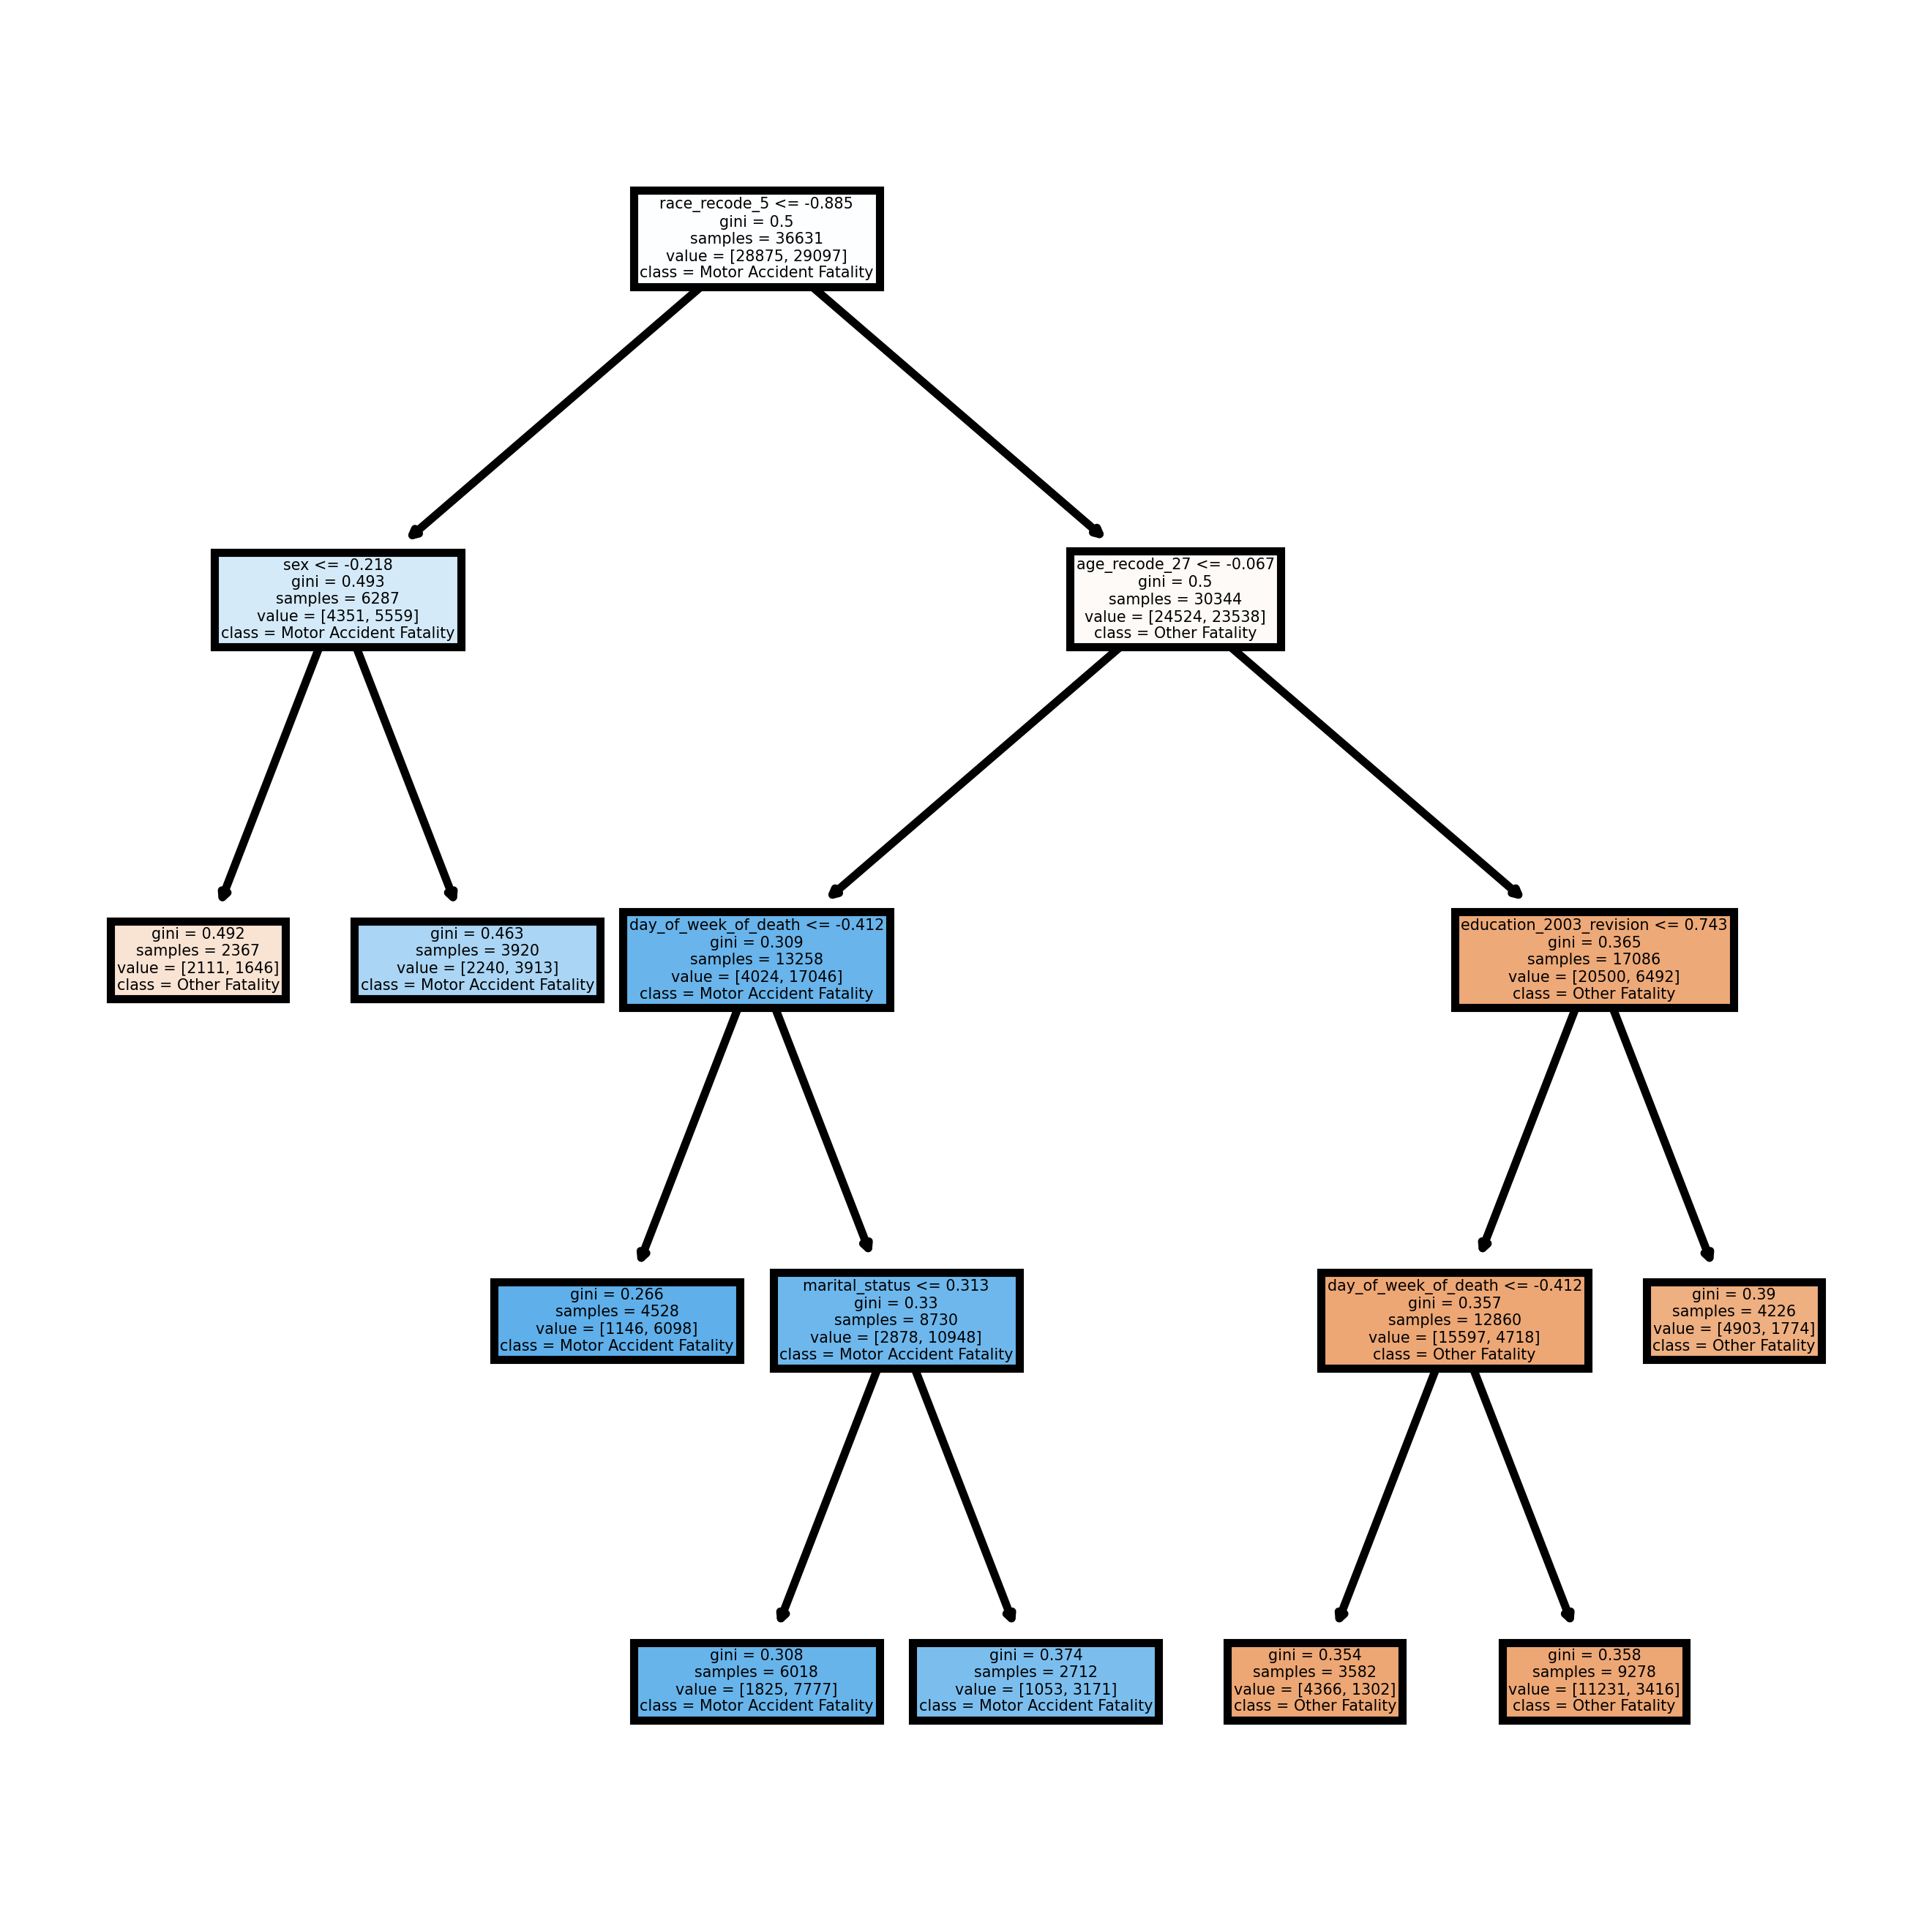

In [10]:
from sklearn import tree

# Displaying one of the Decision Trees used in the Random Forest Model 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[3],
feature_names = X_train.columns,
class_names = ('Other Fatality', 'Motor Accident Fatality'),
filled = True);
# fig.savefig('rf_individualtree1.png')

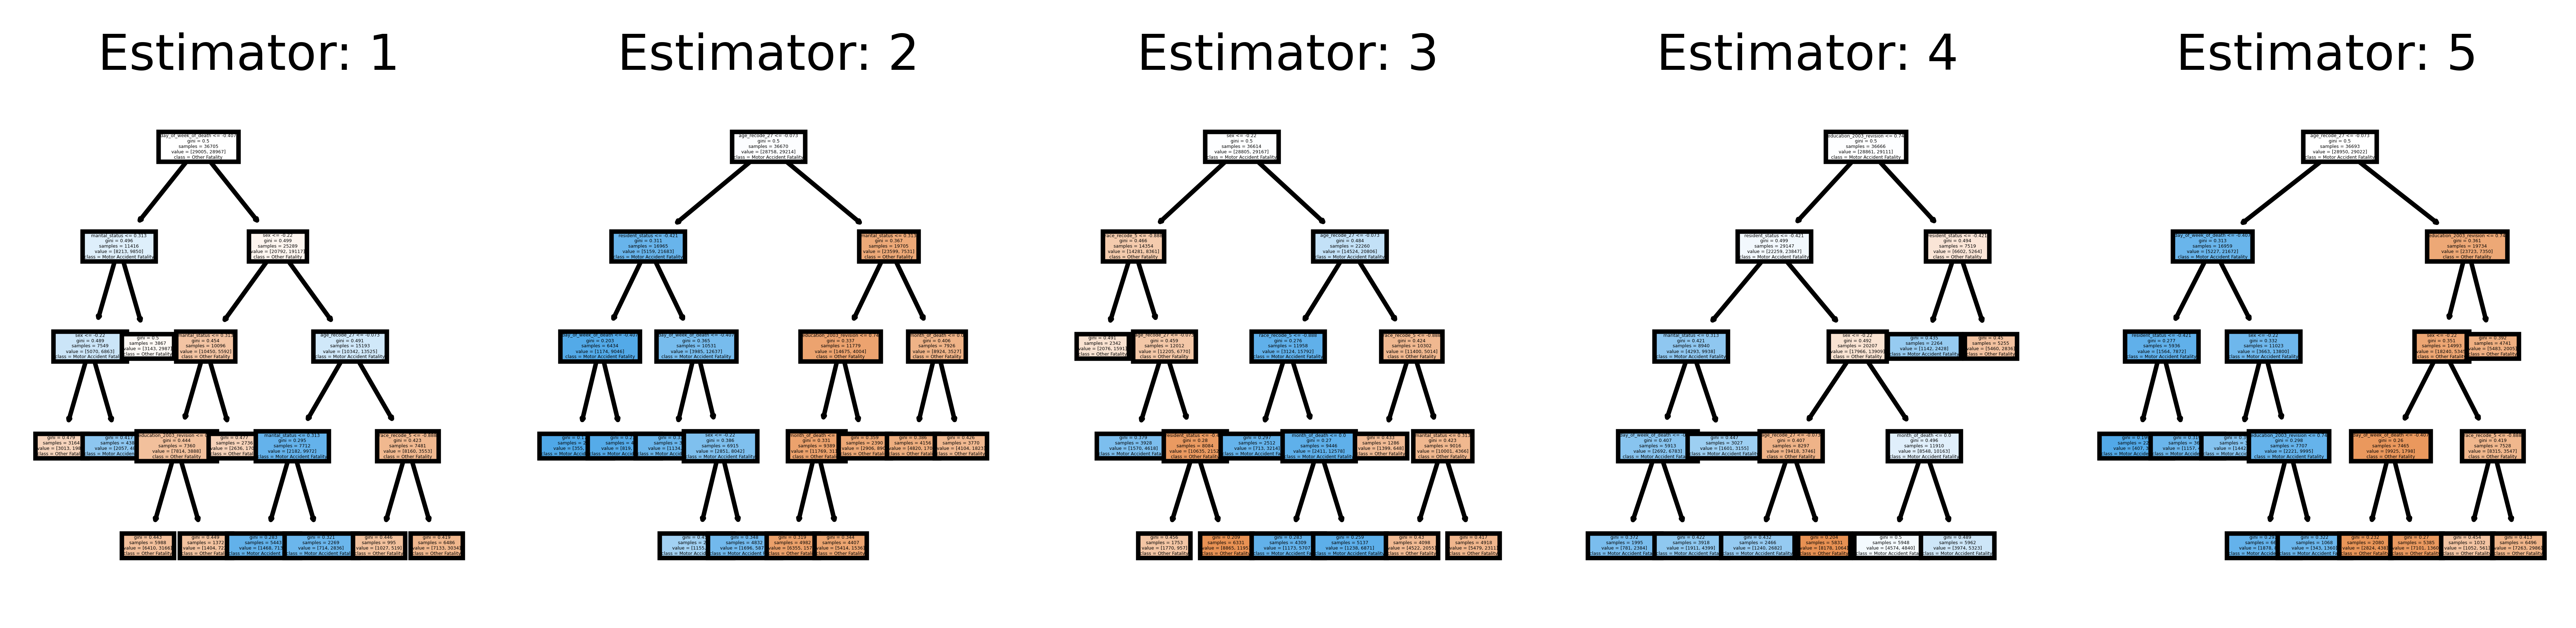

In [6]:
# Plotting a figure with 5 subplots
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

# Displaying 5 estimators used for the Random Forest Model
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = X_train.columns,
                   class_names = ('Other Fatality', 'Motor Accident Fatality'),
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)
# fig.savefig('rf_5trees1.png')

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Predefined appropiate range for the hyperparameters for each Random Forest Model
param_dist = {
    'n_estimators': randint(1, 500),          # At least one tree is needed
    'max_depth': randint(1, 10),              # This range is reasonable, adjust based on data complexity
    'min_samples_leaf': randint(1, 100),      # At least two samples are needed to split
    'min_samples_split': uniform(0.01, 0.49), # More reasonable range for most datasets
    'max_leaf_nodes': randint(1, 300)        # Suitable range for a wide variety of datasets
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=200,  # Number of parameter settings sampled
    scoring = 'recall',
    cv=5,        # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1    # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_recall = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Recall: {recall_score}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 341, in fit
    self._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site-

Best Parameters: {'max_depth': 7, 'max_leaf_nodes': 154, 'min_samples_leaf': 34, 'min_samples_split': 0.24334324142661695, 'n_estimators': 259}
Best Recall: <function recall_score at 0x18d5b4cc0>


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Optimised Random Forest Model
model = RandomForestClassifier(max_depth = 4,
                               max_leaf_nodes = 36,
                               min_samples_leaf = 33,
                               min_samples_split = 0.2, 
                               n_estimators = 39)
model = model.fit(X_train,y_train)

# Prediction of model for the y value for the training, validation and testing set
ypred_train = model.predict(X_train)
ypred_val = model.predict(X_val)
ypred_test = model.predict(X_test)

# Classifier metric scores for model on the training set
acc_train = accuracy_score(y_train, ypred_train)
prec_train = precision_score(y_train,ypred_train)
rec_train = recall_score(y_train,ypred_train)

# Classifier metric scores for model on the validation set
acc_val = accuracy_score(y_val, ypred_val)
prec_val = precision_score(y_val,ypred_val)
rec_val = recall_score(y_val,ypred_val)

# Classifier metric scores for model on the testing set
acc_test = accuracy_score(y_test, ypred_test)
prec_test = precision_score(y_test,ypred_test)
rec_test = recall_score(y_test,ypred_test)

print('TRAINING SET:',
      'Accuracy:{} '.format(acc_train),
      'Precision:{} '.format(prec_train),
      'Recall:{} '.format(rec_train),
      '\n',
      sep='\n')
print('VALIDATION SET:',
      'Accuracy:{} '.format(acc_val),
      'Precision:{} '.format(prec_val),
      'Recall:{} '.format(rec_val),
      '\n',
      sep='\n')
print('TESTING SET:',
      'Accuracy:{} '.format(acc_test),
      'Precision:{} '.format(prec_test),
      'Recall:{} '.format(rec_test),
      '\n',
      sep='\n')

TRAINING SET:
Accuracy:0.7783240184916856 
Precision:0.7548991941805412 
Recall:0.8270697354860873 


VALIDATION SET:
Accuracy:0.7714916517179523 
Precision:0.7456929802005657 
Recall:0.8130081300813008 


TESTING SET:
Accuracy:0.7781150821029391 
Precision:0.7478371501272265 
Recall:0.8264904386951631 




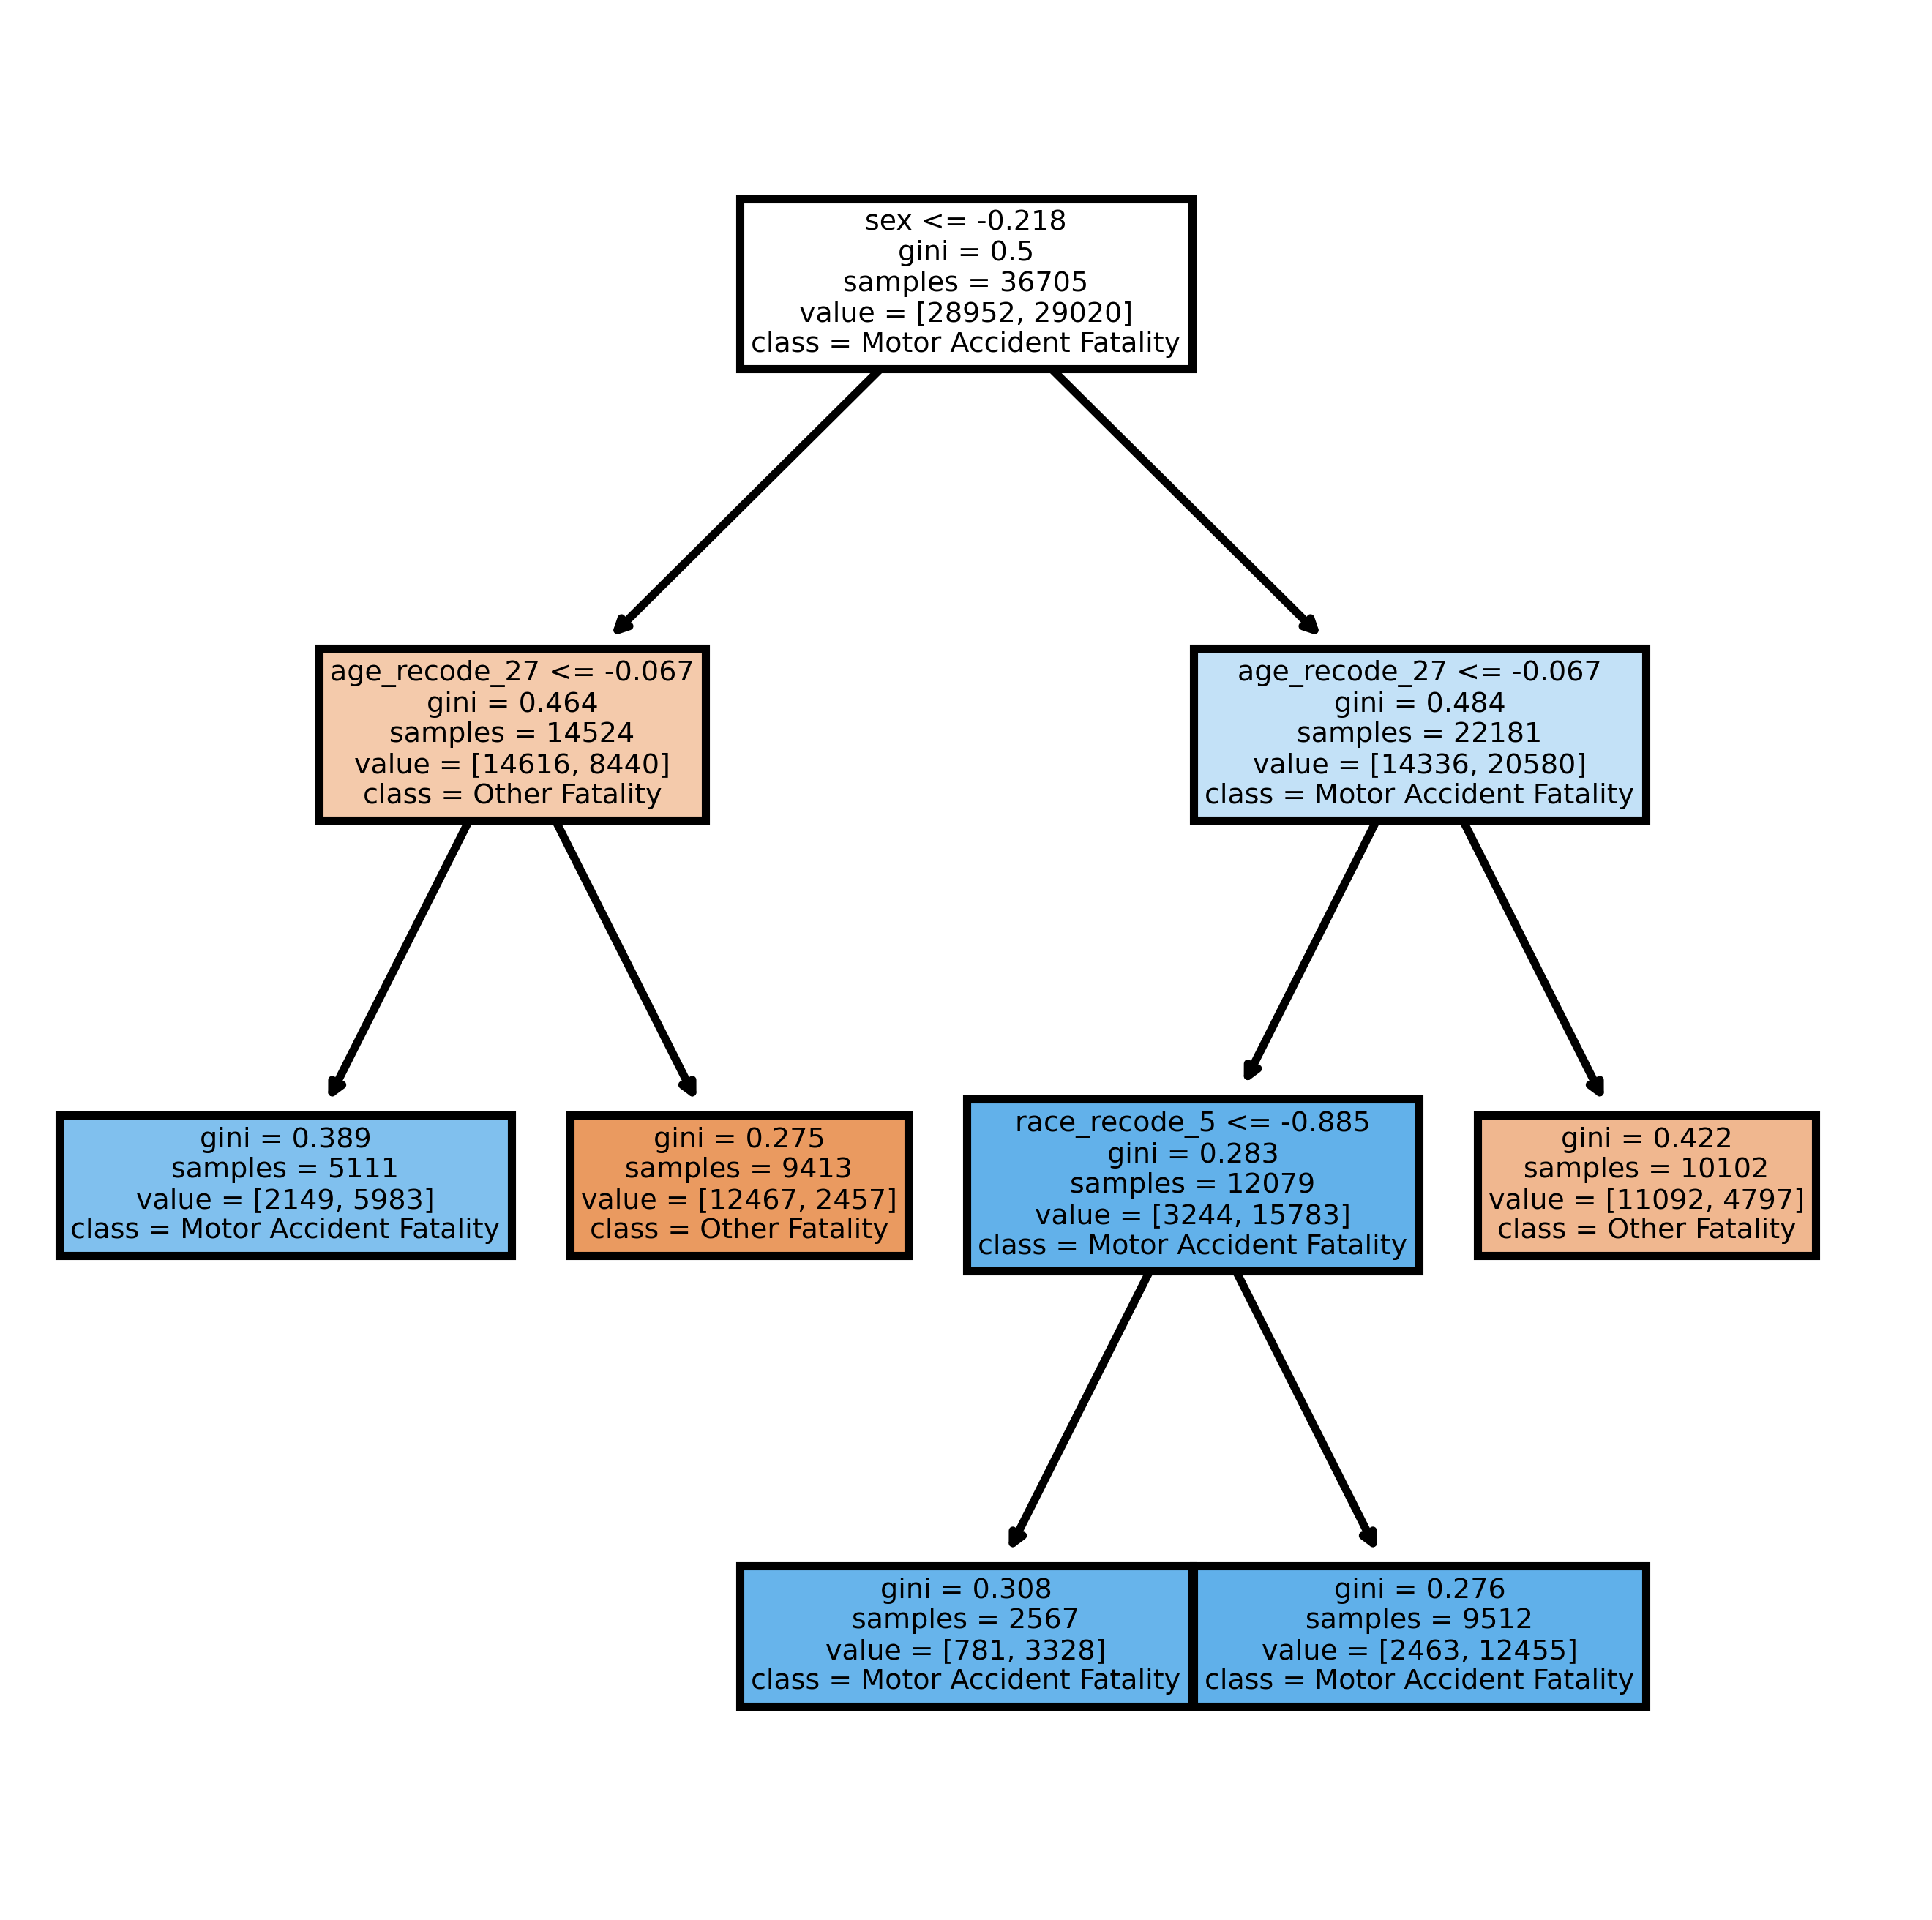

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

# Displaying one of the Decision Trees used in the Random Forest Model 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[1],
               feature_names = X_train.columns,
               class_names = ('Other Fatality', 'Motor Accident Fatality'),
               filled = True);
# fig.savefig('rf_individualtree2.png')

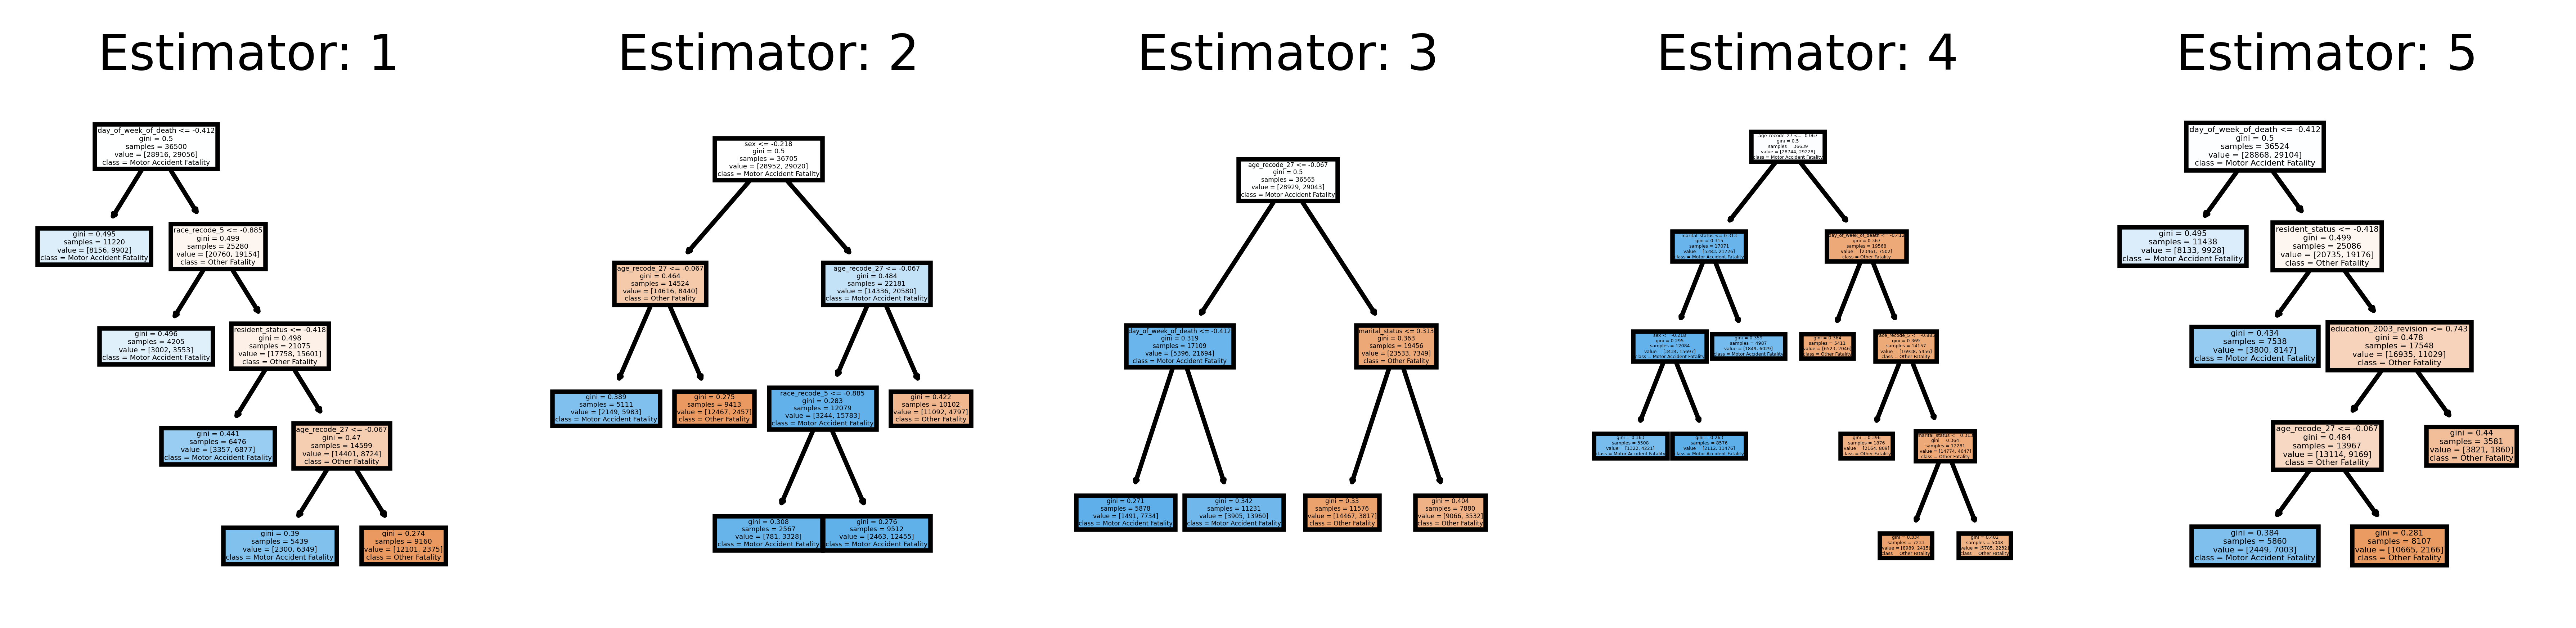

In [14]:
# Plotting a figure with 5 subplots
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

# Displaying 5 estimators used for the Random Forest Model
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = X_train.columns,
                   class_names = ('Other Fatality', 'Motor Accident Fatality'),
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index + 1), fontsize = 11)
# fig.savefig('rf_5trees2.png')

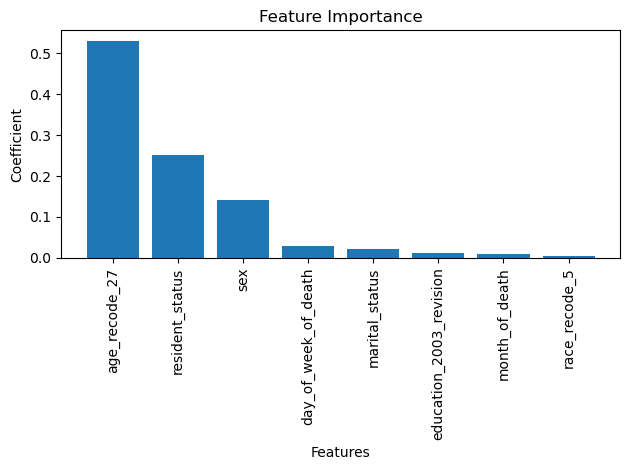

In [15]:
# Selecting and sorting the feature importance in descending order
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plotting feature importance 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()